In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
import warnings

In [4]:
diamondx=pd.read_excel('PricingOfDiamonds.xlsx')
diamondx

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,2757,3829.166667,45.345395,NR,SN
53936,53937,0.72,Good,D,SI1,63.1,2757,3829.166667,43.692552,SP,SN
53937,53938,0.70,Very Good,D,SI1,62.8,2757,3938.571429,43.901274,SN,SN
53938,53939,0.86,Premium,H,SI2,61.0,2757,3205.813953,45.196721,SN,SP


In [5]:
diamondx.head(10)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
5,6,0.24,Very Good,J,VVS2,62.8,336,1400.000000,5.350318,SP,Negative
6,7,0.24,Very Good,I,VVS1,62.3,336,1400.000000,5.393258,SN,Negative
7,8,0.26,Very Good,H,SI1,61.9,337,1296.153846,5.444265,SN,Negative
8,9,0.22,Fair,E,VS2,65.1,337,1531.818182,5.176651,Negative,Negative
9,10,0.23,Very Good,H,VS1,59.4,338,1469.565217,5.690236,Negative,Negative


In [6]:
diamondx.tail(10)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
53930,53931,0.71,Premium,E,SI1,60.5,2756,3881.690141,45.553719,Negative,Positve
53931,53932,0.71,Premium,F,SI1,59.8,2756,3881.690141,46.086957,SN,SN
53932,53933,0.70,Very Good,E,VS2,60.5,2757,3938.571429,45.570248,SN,SN
53933,53934,0.70,Very Good,E,VS2,61.2,2757,3938.571429,45.049020,Positve,SN
53934,53935,0.72,Premium,D,SI1,62.7,2757,3829.166667,43.971292,NR,SN
53935,53936,0.72,Ideal,D,SI1,60.8,2757,3829.166667,45.345395,NR,SN
53936,53937,0.72,Good,D,SI1,63.1,2757,3829.166667,43.692552,SP,SN
53937,53938,0.70,Very Good,D,SI1,62.8,2757,3938.571429,43.901274,SN,SN
53938,53939,0.86,Premium,H,SI2,61.0,2757,3205.813953,45.196721,SN,SP
53939,53940,0.75,Ideal,D,SI2,62.2,2757,3676.000000,44.324759,Negative,SP


DEALING WITH MISSING VALUES

In [9]:
missingData=diamondx.isnull().sum()
missingData

ID          0
carat       0
cut         0
colour      0
clarity     0
depth       0
price       0
x           0
y           0
P          10
PC         10
dtype: int64

<Axes: >

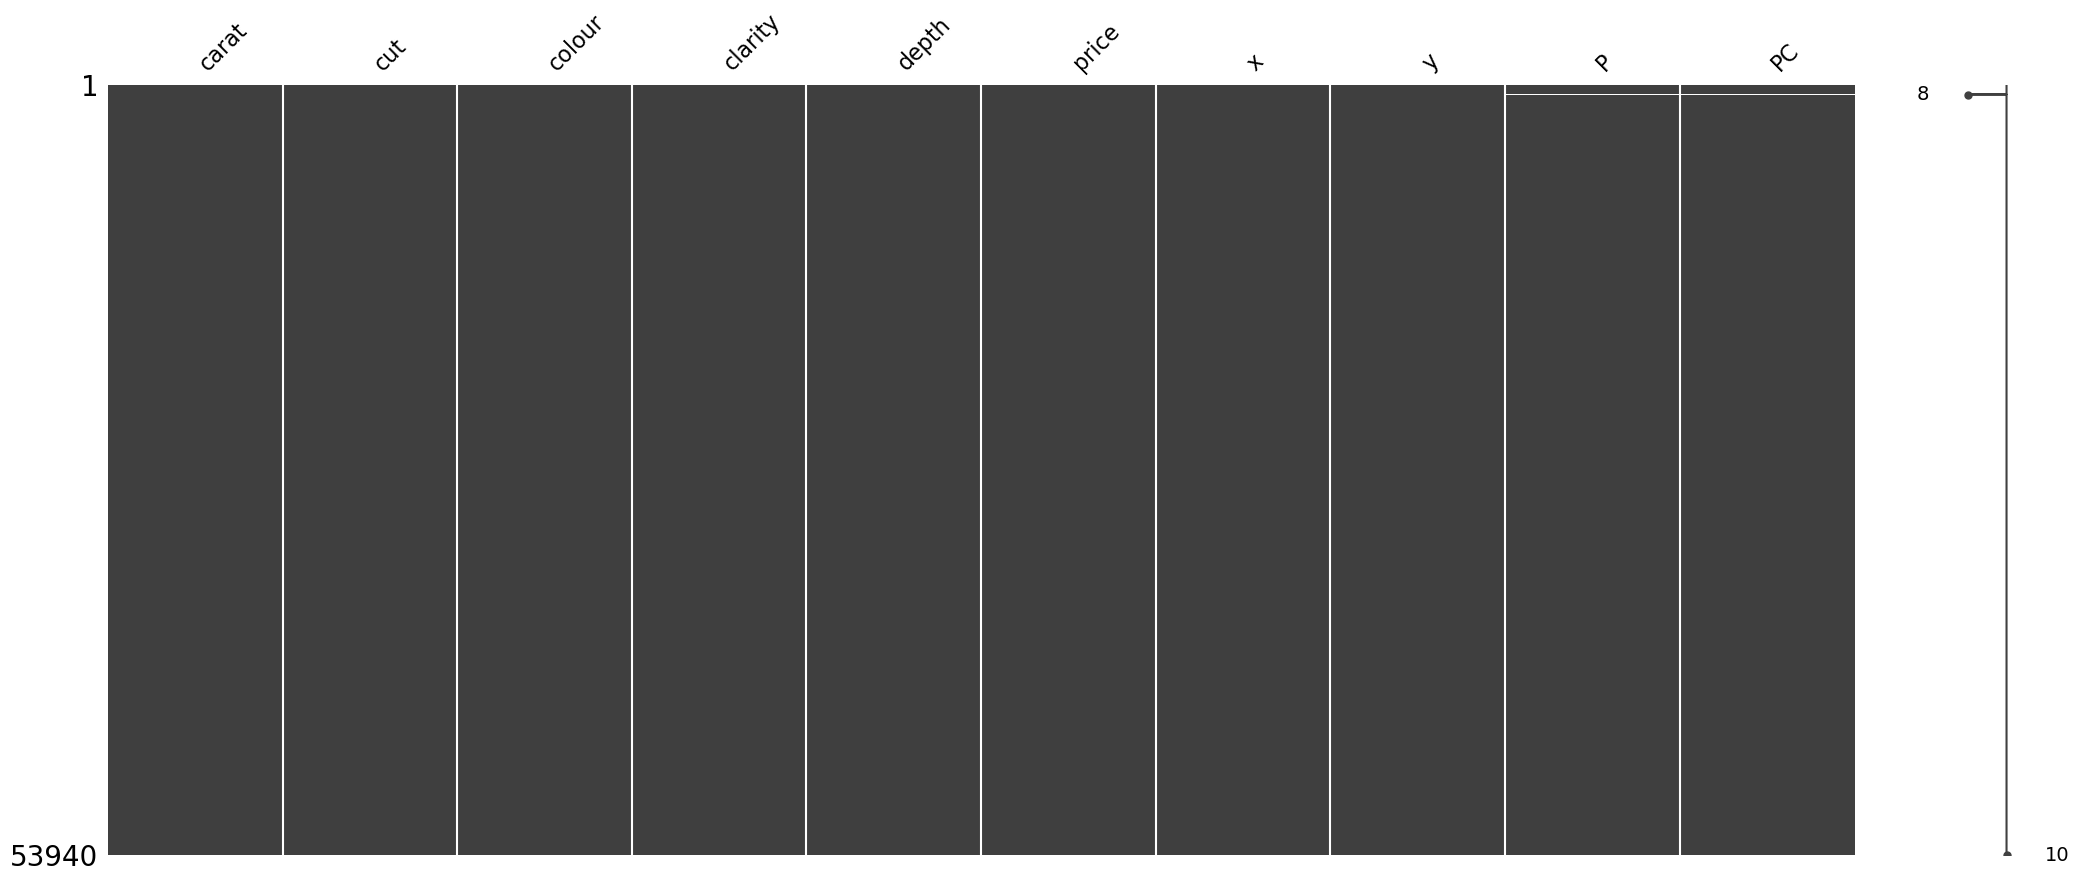

In [13]:
msno.matrix(diamondx)

In [ ]:
#removing column of ID

REMOVING MISSING VALUES
Dropping
Imputation(mean,mode,  )

In [17]:
#getting all continuous values
contData=diamondx.select_dtypes(exclude='object')
#contData=diamondx.select_dtypes(include='int64','float64')
contData

,carat,depth,price,x,y
ID,,,,,
1,0.23,61.5,326,1417.391304,5.300813
2,0.21,59.8,326,1552.380952,5.451505
3,0.23,56.9,327,1421.739130,5.746924
4,0.29,62.4,334,1151.724138,5.352564
5,0.31,63.3,335,1080.645161,5.292259
...,...,...,...,...,...
53936,0.72,60.8,2757,3829.166667,45.345395
53937,0.72,63.1,2757,3829.166667,43.692552
53938,0.70,62.8,2757,3938.571429,43.901274


VISUALIZATION OF CONT PLOTS

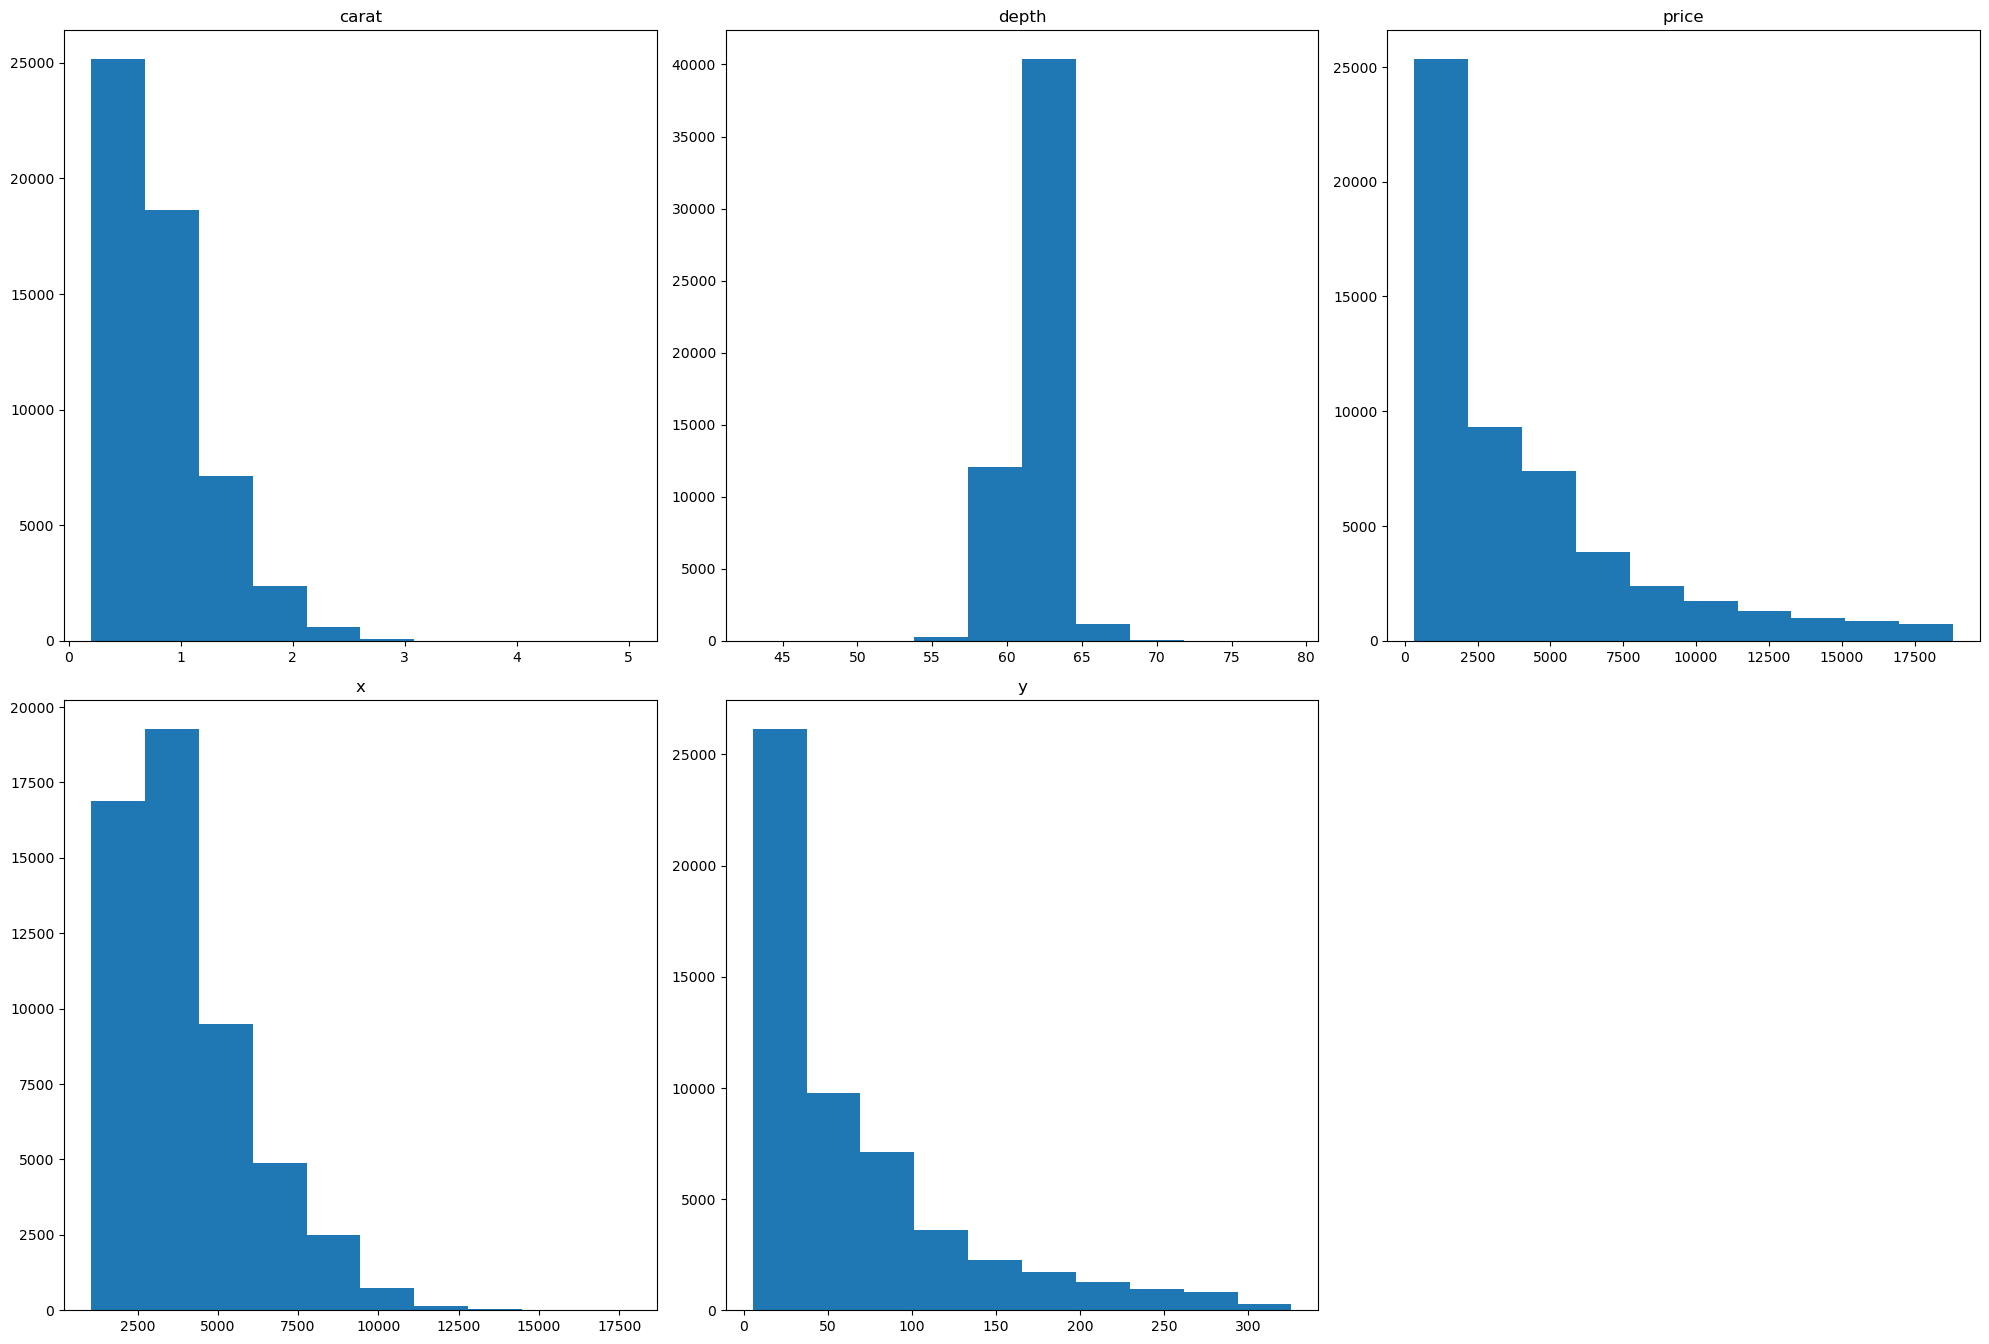

In [18]:
plt.figure(figsize=(20,20))
for i, col in enumerate(contData.columns):
    plt.subplot(3,3,i+1)
    plt.hist(diamondx[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [21]:
#for skewed data
diamondx['carat']=diamondx['carat'].fillna(diamondx['carat'].median())
#for normalized data
diamondx['depth']=diamondx['depth'].fillna(diamondx['depth'].mean())

In [22]:
diamondx['P']=diamondx['P'].fillna(diamondx['P'].mode()[0])
diamondx['PC']=diamondx['PC'].fillna(diamondx['PC'].mode()[0])

In [23]:
missingData=diamondx.isnull().sum()
missingData

carat      0
cut        0
colour     0
clarity    0
depth      0
price      0
x          0
y          0
P          0
PC         0
dtype: int64